In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections as c
import scipy.stats as st

%matplotlib inline

In [2]:
df=pd.read_csv('../data/bbAllConvoLinesDF.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (31,32,34,35,36,38,39,40,42,43,44,46,47,48,50,51,52,54,55,56,58,59,60,62,63,64,66,67,68,70,71,72,74,75,76,78,79,80,82,83,84,86,87,88,90,91,92,94,95,96,98,99,100,102,103,104,106,107,108,110,111,112,114,115,116,118,119,120,122,123,124,126,127,128,130,131,132,134,135,136,138,139,140,142,143,144,146,147,148,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168,170,171,172,174,175,176,178,179,180,182,183,184,186,187,188,190,191,192) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['dateObj']=pd.to_datetime(df.date)

In [4]:
max(df.dateObj)

Timestamp('2012-11-30 23:59:55')

In [23]:
len(df)

526962

## Adjust for Time Zone

In [5]:
df.dateObj=df.dateObj.apply(lambda x: x-pd.to_timedelta('0 days 04:00:00') if x<pd.to_datetime('2012-11-03 22:00:00') else x-pd.to_timedelta('0 days 05:00:00'))

In [28]:
df.replyOrigTime=df.replyOrigTime.apply(lambda x: pd.to_datetime(x) if str(x)!='0' else np.nan)

In [45]:
df.loc[~df.replyOrigTime.isnull(),'replyOrigTime']=df.replyOrigTime[~df.replyOrigTime.isnull()].apply(lambda x: x-pd.to_timedelta('0 days 04:00:00') if x<pd.to_datetime('2012-11-03 22:00:00') else x-pd.to_timedelta('0 days 05:00:00'))

In [46]:
df[df.id==257692290242469888].values

array([[257692290242469888, 'BobbyFuchs', 33439403, True, 260, 98, 20,
        6642, Timestamp('2012-10-15 00:00:04'), 'before', '0',
        'T: 40.853956,-74.036771', 'web', 0, False, 0, '0', False, '[]',
        "[u'xLaStarr']", 'xLaStarr', 257692056435171329,
        "@xLaStarr I'm inviting all of my friends... you're going to have a lot of work to do that night",
        nan, '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0',
        '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0',
        '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0, '0', '0', '0', 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
df.date=df.dateObj

### Limit the data to the Analysis Window of 10/15/2012-11/23/2012

In [8]:
df=df[(df.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (df.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [9]:
len(df)

526962

In [10]:
len(df[df.replyWhat!=0])

526962

In [11]:
inBBreps=df[df.replyOrigTime!='0'].copy()

### LIMIT the dataset only to tweets that reply to tweets we also have

In [13]:
inBBreps['repSecDiff']=(inBBreps.dateObj-pd.to_datetime(inBBreps.replyOrigTime)).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

In [14]:
inBBreps.repSecDiff.head()

19644   -14367
20448   -11614
20520    12866
20528   -14102
20678   -10348
Name: repSecDiff, dtype: int64

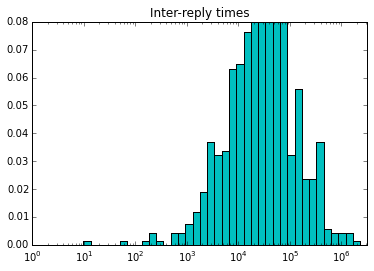

In [11]:
data = inBBreps.repSecDiff.dropna().tolist()
bins=np.logspace(0, int(np.log(max(data))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(data,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Inter-reply times')

In [12]:
np.median(data)

-14292.0

**Takeway**
* Inter-reply patterns are similar to inter-tweet time (in bbInterReplyTimeOneSide)
* This means that people have similar work session practices for reply activity as just tweets
* So when they reply has more to do with their own tweeting patterns than with the timing of the tweet they are replying to?
* The graph above somewhat confirms it: the long tail suggest that inter-arrival time seems consistent with Poisson process (?)
* **Look into this**
* There is a single work-session practice, but it doesn't have a meaningful center, as it's long-tailed

### Adjust for time zone

In [12]:
inBBreps.dateObj=inBBreps.dateObj.apply(lambda x: x+pd.to_timedelta('0 days 04:00:00') if x<pd.to_datetime('2012-11-03 22:00:00') else x+pd.to_timedelta('0 days 05:00:00'))

# Check inter-Reply time for different disaster stages

In [13]:
before=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-10-25 00:00:00'))]

In [14]:
during=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-10-25 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-11-04 00:00:00'))]

In [15]:
after=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-11-04 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-11-14 00:00:00'))]

In [16]:
lafter=inBBreps[(inBBreps.dateObj>=pd.to_datetime('2012-11-14 00:00:00')) & (inBBreps.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [17]:
bSecDiff=before.repSecDiff.dropna().tolist()
dSecDiff=during.repSecDiff.dropna().tolist()
aSecDiff=after.repSecDiff.dropna().tolist()
laSecDiff=lafter.repSecDiff.dropna().tolist()

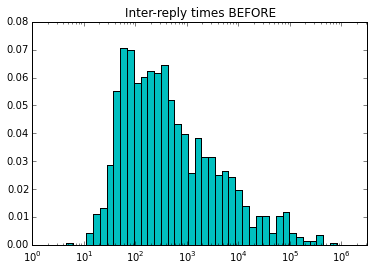

In [18]:
bins=np.logspace(0, int(np.log(max(bSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times BEFORE')

In [19]:
np.median(bSecDiff)

319.0

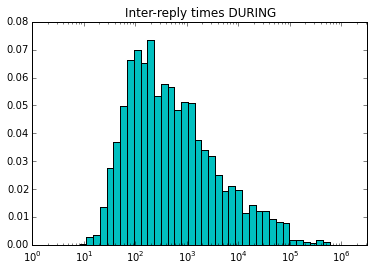

In [20]:
bins=np.logspace(0, int(np.log(max(dSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times DURING')

In [21]:
np.median(dSecDiff)

379.5

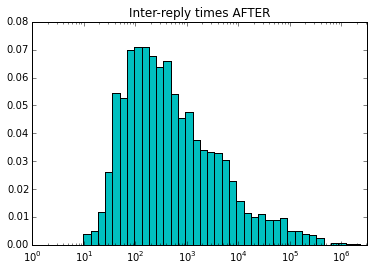

In [22]:
bins=np.logspace(0, int(np.log(max(aSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times AFTER')

In [23]:
np.median(aSecDiff)

360.0

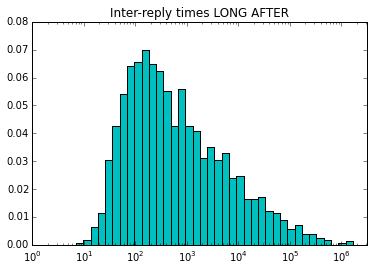

In [24]:
bins=np.logspace(0, int(np.log(max(laSecDiff))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laSecDiff,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0,ymax=0.08)
plt.title('Inter-reply times LONG AFTER')

In [25]:
np.median(laSecDiff)

404.0

### Check if the differences between time slices is stat sig

In [26]:
st.kruskal(bSecDiff,dSecDiff,aSecDiff,laSecDiff)

(12.729732974008282, 0.0052590670090423642)

Kruskall-Wallis (non-param ANOVA) is **signifcatnt** - there are differences between these distrbutions. Check which one

### Do Mann-Whitney with Bonferroni correction (/ by # of comparisons)

In [27]:
st.ranksums(bSecDiff, dSecDiff)

(-2.2747867461468974, 0.022918725696061747)

In [28]:
st.ranksums(bSecDiff, laSecDiff)

(-3.3691074167755528, 0.00075412033571753943)

B is different from D and LA (w/o Bonferroni)

In [ ]:
0.05/2

** Takeway:**
* The alpha level with Bonferroni correction is 0.0083
* At this level, only B and LA are significantly different
* What does this mean for D and A?